# Algorithms: linear classifier

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Linear classifier
The concept of a linear classifier  
is to find a line (or hyperplane)  
that separates two groups data points  
(each data points have labels either $1$ or $-1$).  

The normal vector of this line (or hyperplane)  
is then called the **linear classifier**.

The line (or hyperplane)  
separates the space into two parts.  
When a new data point is given,  
we may check which part does this point belong to  
and then predict the label.

![Linear classifier](linear_classifier.png "Linear classifier")

### Linear classifier and inner product
Let ${\bf v}$ be a vector.  
Then ${\bf v}$ separate the space into two parts,  
$H_+ = \{{\bf p}\in\mathbb{R}^d: {\bf p}\cdot {\bf v} > 0\}$  
and  
$H_- = \{{\bf p}\in\mathbb{R}^d: {\bf p}\cdot {\bf v} < 0\}$.

Let $\{{\bf x}\}_{i=1}^N$ be a set of $N$ points  
with each point labeled as $1$ or $-1$.  
Let $y_i$ be the label of ${\bf x}_i$.  

We say ${\bf v}$ is a **linear classifier** if  
* ${\bf x}_i\cdot{\bf v} > 0 \iff y_i = 1$ for all $i$
* ${\bf x}_i\cdot{\bf v} < 0 \iff y_i = -1$ for all $i$

### `normal` being a linear classifier
Let `normal` be a vector.  
Let `X` be a dataset of shape `(N, d)`.  
(`X` has `N` samples with `d` features.)  
Let `y` be the label of shape `(N, )`.

Through Numpy,  
whether `normal` is a linear classifier  
can be checked by  
`np.all( np.sign(np.dot(X, normal))== y )`. 

### `normal` not being a linear classifier
If `normal` is not a linear classifier,  
then there must be a data point `X[i]`  such that  
`np.dot(X[i], normal)` and `y[i]` have the opposite signs.  
Equivalently, `np.dot(X[i], normal) * y[i] < 0`.  

In this case, we say  
`normal` is not a linear classifier  
witnessed by `X[i]` and `y[i]`.

### Algorithm
Let `X` be a dataset.  
Each data point is labled by `1` or `-1`.  
The label is recorded by `y`.

The goal is to find a normal vector `normal`  
such that `np.sign(np.dot(X, normal))` is `y` (if possible).  

1. Set `normal` as the zero vector (or any vector).  
2. If `normal` is not a linear classifier witnessed by `X[i]` and `y[i]`,  
then update `normal` by  
  * `normal -= X[i]` if `np.dot(X[i], normal) > 0` and `y[i] < 0`
  * `normal += X[i]` if `np.dot(X[i], normal) > 0` and `y[i] < 0`  
3. Repeat Step 2 until `normal` becomes a linear classifier.

Note:  
The update process can be simplified into one line below.  
```Python
normal = normal + y[i]*X[i]
```

### Pseudocode
**Input**:  
a dataset `X` of shape `(N, d)` and  
the label `y` of shape `(N,)`  
(the label is either `1` or `-1`)  
**Output**:
an array `normal = [c1 ... cd]`  
such that `np.sign(np.dot(X, normal))` is `y`

```Python
normal = zero vector of dimension d (or any vector)
again = True
while again:
    again = False
    if `normal` is not a linear classifier  
    (witnessed by X[i] and y[i]):
        update normal
        again = True
```

##### Exercise
Given `d = 2`,  
create a zero array `normal` of shape `(d, )`.

In [ ]:
### your answer here


##### Exercise  
Let `X = np.random.randn(100, 2)`,  
`normal = np.random.randn(2)`, and  
`y = np.random.choice([-1,1], 100)`.

Write a `for` loop to find every pair `X[i]` and `y[i]`  
that witness `normal` not being a linear classifier.

In [ ]:
### your asnwer here


##### Exercise
Following the setting of the previous exercise,  
sometimes you just want to find  
one pair of `X[i]` and `y[i]`  
that witness `normal` not being a linear classifier.  

Use `break` to stop the `for` loop when you find one.

In [ ]:
### your asnwer here


##### Exercise  
Obtain `X` and `y` by the code below.  
```Python 
X = np.random.randn(100, 2)
y = np.sign(np.dot(X, np.random.randn(2)))
```

In [5]:
### your answer here


##### Exercise
Write a function `linear_classifier(X, y)`  
that returns a linear classifier `normal`.

In [19]:
### your answer here


##### Exercise  
Let `X = np.random.randn(100, 2)` and  
`normal = np.random.randn(2)`.  

Compute the accuracy of `normal`.  
That is, calculate the number of pairs `X[i]` and `y[i]`  
such that `np.dot(X[i], normal)` and `y[i]` have the same sign,  
and divide this number by the total number of samples  
to get the accuracy.

In [19]:
### your answer here


##### Exercise
Add a new keyword `acc` to your `linear_classifier` function.  
When `acc` is `True`,  
print the current accuracy  
whenever `normal` is updated.

In [19]:
### your answer here


##### Exercise
You `linear_classifier` can be very powerful.  

Obtain the required settings below.
```Python
X = np.random.randn(100, 2)
y = np.sign(np.dot(X, np.random.randn(2)) + 0.1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['1'] = 1
```

It is likely that `linear_classifier(X, y, acc=True)` never stops.  
But `linear_classifier(df.values, y, acc=True)` will work.  

Why?  What is the meaning of the output?

In [19]:
### your answer here


##### Exercise
You `linear_classifier` can be very powerful.  

Obtain the required settings below.
```Python
X = np.random.randn(100, 2)
y = np.sign(np.sum(X**2, axis=1) - 0.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['x1^2'] = df['x1']**2
df['x2^2'] = df['x2']**2
df['1'] = 1
```

It is likely that `linear_classifier(X, y, acc=True)` never stops.  
But `linear_classifier(df.values, y, acc=True)` will work.  

Why? What is the meaning of the output?

In [19]:
### your answer here


##### Sample code for a linear classifier passing through the origin

In [3]:
def linear_classifier(X, y, acc=False):
    """
    Input:
        X: array of shape (N, d) with N samples and d features
        y: array of shape (N,); labels of points (-1 or 1)
    Output:
        an array normal = [c1, ..., cd] of shape (d,)  
        such that np.sign(np.dot(X, ans)) is y.
    """
    N,d = X.shape
    normal = np.array([0]*d, X.dtype)
    
    again = True
    while again:
        again = False
        for i in range(N):
            row = X[i]
            label = y[i]
            if np.dot(row, normal) * label <= 0:
                normal += label * row
                again = True
                break
        if acc:
            print((np.sign(np.dot(X, normal)) == y).mean())
    return normal

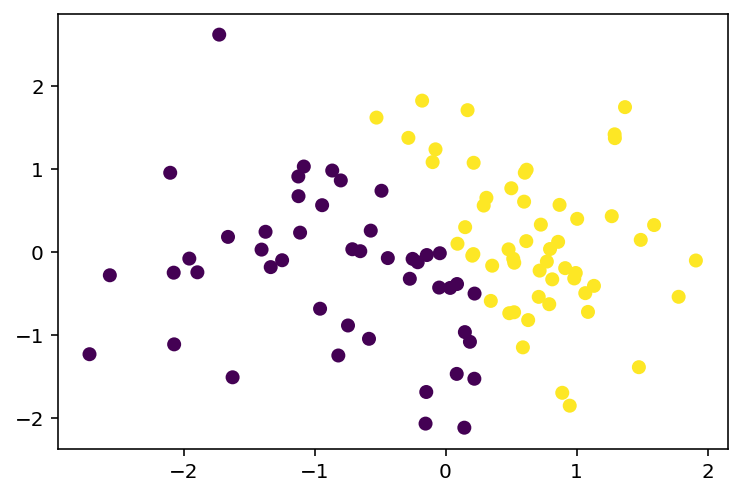

In [15]:
N = 100
d = 2
X = np.random.randn(N, d)
y = np.sign(np.dot(X, np.random.randn(d)))

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [16]:
normal = linear_classifier(X, y, acc=True)

0.4
0.48
0.97
0.92
0.93
0.97
0.79
0.82
0.85
0.98
0.93
0.95
0.97
0.82
0.82
0.87
0.98
0.96
0.96
0.98
0.82
0.82
0.87
0.98
0.97
0.82
0.83
0.87
0.98
0.96
0.98
0.97
0.82
0.83
0.9
0.98
0.96
0.98
0.97
0.82
0.84
0.91
0.98
0.97
0.82
0.87
0.93
0.99
0.96
0.98
0.97
0.83
0.87
0.94
0.99
0.96
0.98
0.97
0.83
0.87
0.95
0.99
0.97
0.84
0.87
0.96
0.99
0.96
0.99
0.97
0.85
0.87
0.97
0.99
0.96
0.99
0.97
0.87
0.89
0.97
0.99
0.97
0.87
0.93
0.98
0.99
0.96
0.99
0.97
0.87
0.93
0.98
0.99
0.96
0.99
0.97
0.87
0.93
0.98
0.99
0.96
0.99
0.97
0.87
0.93
0.98
0.99
0.97
0.87
0.95
0.98
0.99
0.96
0.99
0.97
0.87
0.95
0.98
0.99
0.96
0.99
0.97
0.89
0.96
0.98
0.99
0.97
0.92
0.96
0.98
1.0
1.0


In [4]:
def draw_classifier_origin(X, y, normal):
    """
    Input:
        X, y: the X, y to be used for linear_classifier
        normal: a normal vector
    Output:
        an illustration of the classifier
        This function works only when X.shape[1] == 2.
    """
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes()
    ### draw data points
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
    
    ### set boundary
    xleft, xright = X[:,0].min(), X[:,0].max()
    yleft, yright = X[:,1].min(), X[:,1].max()
    xwidth = xright - xleft
    ywidth = yright - yleft
    width = max([xwidth, ywidth])
    xleft, xright = xleft - (width-xwidth)/2, xright + (width-xwidth)/2
    yleft, yright = yleft - (width-ywidth)/2, yright + (width-ywidth)/2
    ax.set_xlim(xleft, xright)
    ax.set_ylim(yleft, yright)
    
    ### draw normal vector and the line
    length = np.sqrt(np.sum(normal ** 2))
    c1,c2 = normal / length * (0.25*width)
    ax.arrow(0, 0, c1, c2, color='red', head_width=0.05*width)
    ax.plot([-4*width*c2, 4*width*c2], [4*width*c1, -4*width*c1], color='red')
#     fig.savefig('linear_classifier.png')

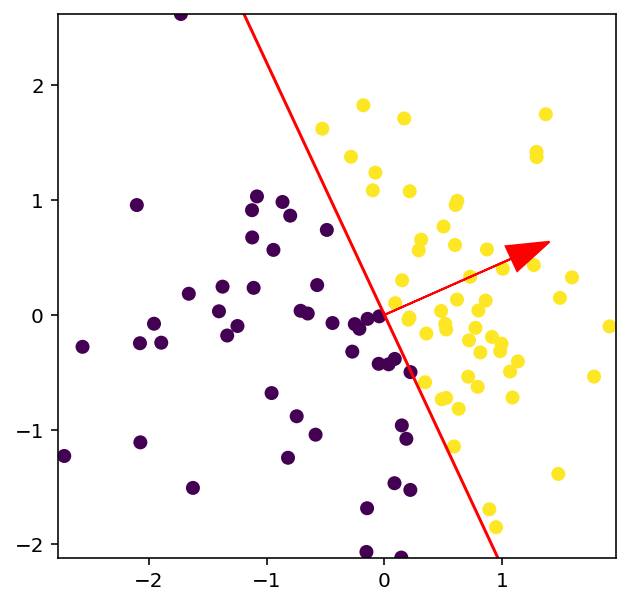

In [18]:
draw_classifier_origin(X, y, normal)